<a href="https://colab.research.google.com/github/mcastrezana/Curso.Prep.Henry/blob/master/ProyectoDS_ParteI_Castrezana_Tapia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Credit Risk Classification Dataset
###Tema: Clientes bancarios riesgosos para línea de crédito
###Pregunta Principal:

¿Qué factores contribuyen al riesgo crediticio de los clientes?

###Preguntas Secundarias:

¿Cantidad de clientes morosos?

¿En qué medida inciden los factores sociodemógraficos en el riesgo crediticio?

¿Cuáles son los factores que más inciden en el riesgo crediticio?

###Variable a predecir:
* Label

###Variables:

*Total de pagos retrasados (tipo 1, 2 y 3)

*Días de retraso

*Total de pagos en tiempo

*Producto crediticio

*fea 1-11 (factores sociodemográficos

###Abstract:

El Dataset "Credit Risk Classification" contiene información demográfica y crediticia de los clientes riesgosos y no riesgosos, las observaciones contenidas corresponden al período de tiempo de 1987-2016, año en que se realiza la última actualización del dataset. El dataset está compuesto por dos tablas, la primera contiene los datos demográficos y la segunda las variables relacionadas con el pago. Algunas de las variables son los clientes riesgosos, los pagos retrasados de tipo 1, 2 y 3, los dias de retrado, el total de pagos a tiempo, el producto crediticio, el límite de crédito el balance, la fecha de actualización de la cuenta y ocho variables demográficas codificadas por cuestión de protección a los datos personales de los clientes del banco. Nuestro objetivo principal al trabajar con este dataset es contestar a las siguientes preguntas: ¿Qué factores contribuyen al riesgo crediticio de los clientes?, ¿Cuál es el comportamiento del cliente digno de crédito?, ¿Cantidad de clientes morosos?, ¿Qué características demográficas tienen los clientes considerados como riesgosos?, ¿Existe una relación entre las características demográficas de los clientes y el límite de crédito?, ¿Cuáles de estas características demográficas inciden mayormente en el límite crediticio?, ¿Qué tipo de pagos retrasados tiene un mayor impacto sobre la definición de si se es un cliente riesgoso o no? Para hacerlo, se tendrá como variable dependiente "label" que expresa si el cliente es considerado riesgoso o no y se realizará una serie de análisis estadísticos con el fin de conocer el comportamiento de cada una de nuestras variables, dependiente e independientes, como visualización de los datos, estadística descriptiva y correlaciones entre variables.

###Objetivo:

Definir el perfil de usuario con riesgo crediticio a partir de sus características sociodemográficas y de su comportamiento financiero.

###Contexto comercial

Para las empresas bancarias es importante conocer el perfil de un usuario riesgoso con el fin de personalizar la atención que se le da, las medidas que se deciden tomar y los productos que se le ofrecen o se le da acceso, lo que consecuentemente le permite a los bancos disminuir sus perdidas y aumentar sus utilidades. 

###Problema comercial

Las instituciones bancarias tienen perdidas considerables debido a los clientes morosos o que simplemente incumplen sus obligaciones en cuanto a títulos de crédito (préstamos, hipotécas, pagarés, etc.), conocer el perfil de este tipo de usuarios permitiría a las instituciones tomar medidas al respecto para disminuir sus pérdidas.

###Contexto analítico

Se tiene la oportunidad de trabajar con un dataset que recoje los datos sociodemográficos y bancarios de usuarios riesgosos y no riesgosos, lo que nos permite aplicar diversos análisis, pruebas y algoritmos para cumplir con nuestros objetivos de investigación.

###Enlace: https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset

##Cargar documento y librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=5110c93817bdedcbdc45d2820d90566e907dda0df92dfa23de448a541ba72b9d
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd8cce492ad5dd26bf3aedc4bf
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=9b234b683e6008ecfeb57b066b26f492a4e0ca8c26e59d828c72e5d22f38b3b4
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleuti

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from scipy import stats as st
import pingouin as pg 

In [4]:
pd.options.display.max_columns=10

In [5]:
payment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Primera Entrega/payment_data.csv', header=0)
payment.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,...,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,...,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,...,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,...,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,...,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,...,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [6]:
payment['update_date'] = pd.to_datetime(payment['update_date'])

In [7]:
payment['report_date'] = pd.to_datetime(payment['report_date'])

In [8]:
customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Primera Entrega/customer_data.csv', header=0)
customer.head()

,label,id,fea_1,fea_2,fea_3,...,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,...,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,...,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,...,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,...,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,...,5,108,4,450081,197.403141


In [9]:
custlabel = customer[['id','label']]
custlabel

,id,label
0,54982665,1
1,59004779,0
2,58990862,0
3,58995168,1
4,54987320,0
...,...,...
1120,58988196,0
1121,58987926,0
1122,58995381,0
1123,58998054,0


In [10]:
payriskhist = payment.merge( custlabel , left_on= 'id' , right_on= 'id' )
payriskhist

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,...,update_date,new_balance,highest_balance,report_date,label
0,58987402,0,0,0,0,...,2016-04-12,0.0,NaN,NaT,0
1,58987402,0,0,0,0,...,2016-04-10,42000.0,35500.0,NaT,0
2,58987402,0,0,0,0,...,2016-02-13,7938.0,7115.0,2016-03-24,0
3,58987402,0,0,0,0,...,2015-07-27,30039.6,48061.0,2016-04-08,0
4,58987402,0,0,0,0,...,2011-07-12,0.0,150500.0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...
8245,58982397,1,0,0,30,...,2006-01-13,0.0,40863.0,2009-04-26,0
8246,58982397,0,0,0,0,...,2004-12-20,-1.2,1052.0,2006-06-04,0
8247,58982397,0,0,0,0,...,2004-06-05,0.0,27287.0,2013-12-01,0
8248,58982397,0,0,0,0,...,2003-10-25,0.0,6380.0,2005-03-20,0


##Estadística Descriptiva

In [ ]:
payriskhist.describe()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,...,prod_code,prod_limit,new_balance,highest_balance,label
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,2132.000000,8.250000e+03,7.841000e+03,8250.000000
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,...,8.232000,85789.702205,1.054042e+05,2.192027e+05,0.168121
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,...,3.533055,74345.828184,1.887704e+06,2.814536e+06,0.373997
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.100000,-4.030320e+04,5.010000e+02,0.000000
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,...,6.000000,37400.000000,0.000000e+00,2.345300e+04,0.000000
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,...,10.000000,68200.000000,0.000000e+00,4.404700e+04,0.000000
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,...,10.000000,112200.000000,2.494800e+04,1.005000e+05,0.000000
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,...,27.000000,660000.000000,1.632120e+08,1.800005e+08,1.000000


In [ ]:
customer.describe()

,label,id,fea_1,fea_2,fea_3,...,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,...,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,...,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,...,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,...,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,...,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,...,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,...,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,...,10.000000,115.000000,5.000000,650070.000000,707.106781


##Escalamiento

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num = ['OVD_t1','OVD_t2','OVD_t3','OVD_sum','pay_normal','prod_code','prod_limit','new_balance','highest_balance']

payriskhist[num] = MinMaxScaler().fit_transform(payriskhist[num])

payriskhist.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,...,update_date,new_balance,highest_balance,report_date,label
0,58987402,0.0,0.0,0.0,0.0,...,2016-04-12,0.000247,NaN,NaT,0
1,58987402,0.0,0.0,0.0,0.0,...,2016-04-10,0.000504,0.000194,NaT,0
2,58987402,0.0,0.0,0.0,0.0,...,2016-02-13,0.000296,0.000037,2016-03-24,0
3,58987402,0.0,0.0,0.0,0.0,...,2015-07-27,0.000431,0.000264,2016-04-08,0
4,58987402,0.0,0.0,0.0,0.0,...,2011-07-12,0.000247,0.000833,NaT,0


In [ ]:
numcust = ['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11']

customer[numcust] = MinMaxScaler().fit_transform(customer[numcust])

customer.head()

,label,id,fea_1,fea_2,fea_3,...,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,0.666667,0.353909,1.0,...,0.545455,0.882353,1.00,0.154727,0.345485
1,0,59004779,0.500000,0.440329,0.0,...,0.000000,0.705882,0.50,0.477501,0.291987
2,0,58990862,1.000000,0.497942,0.0,...,0.000000,0.725490,1.00,0.020338,0.000000
3,1,58995168,1.000000,0.600823,0.0,...,0.545455,0.901961,0.50,0.000142,0.000000
4,0,54987320,1.000000,NaN,0.5,...,0.545455,0.862745,0.75,0.661076,0.278149


##Visualizaciones

<BarContainer object of 8250 artists>

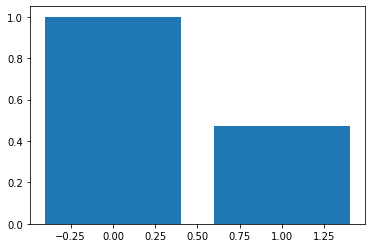

In [ ]:
plt.bar(payriskhist.label, payriskhist.OVD_t1)

<BarContainer object of 8250 artists>

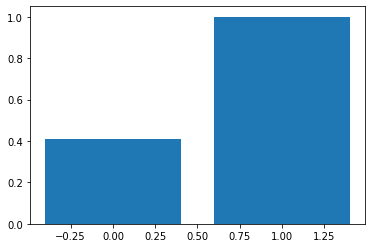

In [ ]:
plt.bar(payriskhist.label, payriskhist.OVD_t2)

<BarContainer object of 8250 artists>

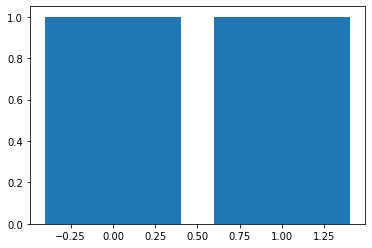

In [ ]:
plt.bar(payriskhist.label, payriskhist.OVD_t3)

<BarContainer object of 8250 artists>

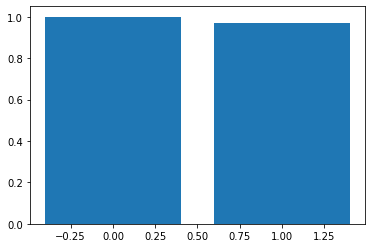

In [ ]:
plt.bar(payriskhist.label, payriskhist.OVD_sum)

<BarContainer object of 8250 artists>

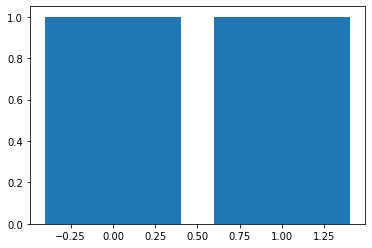

In [ ]:
plt.bar(payriskhist.label, payriskhist.pay_normal)

<BarContainer object of 8250 artists>

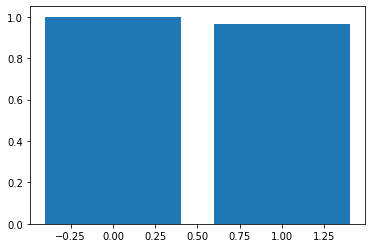

In [ ]:
plt.bar(payriskhist.label, payriskhist.prod_code)

<BarContainer object of 8250 artists>

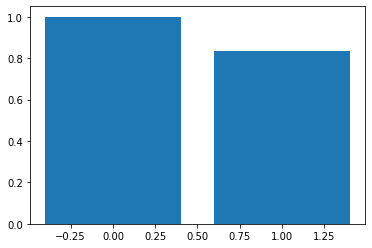

In [ ]:
plt.bar(payriskhist.label, payriskhist.prod_limit)

<BarContainer object of 8250 artists>

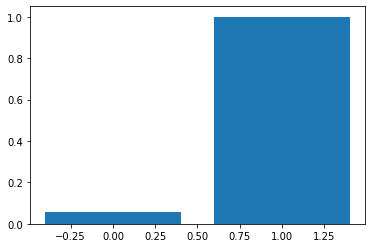

In [ ]:
plt.bar(payriskhist.label, payriskhist.new_balance)

<BarContainer object of 8250 artists>

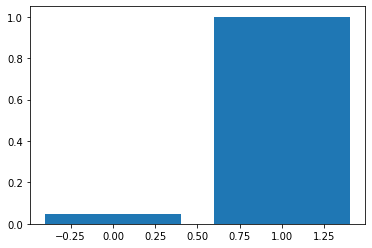

In [ ]:
plt.bar(payriskhist.label, payriskhist.highest_balance)

<BarContainer object of 1125 artists>

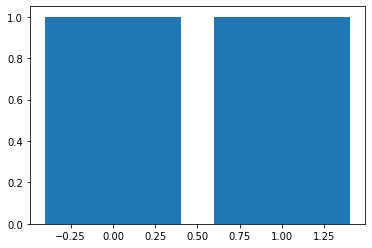

In [ ]:
plt.bar(customer.label, customer.fea_1)

<BarContainer object of 1125 artists>

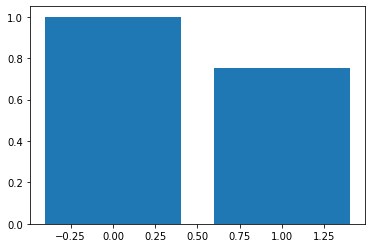

In [ ]:
plt.bar(customer.label, customer.fea_2)

<BarContainer object of 1125 artists>

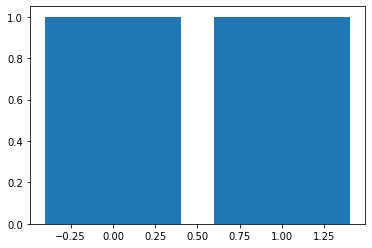

In [ ]:
plt.bar(customer.label, customer.fea_3)

<BarContainer object of 1125 artists>

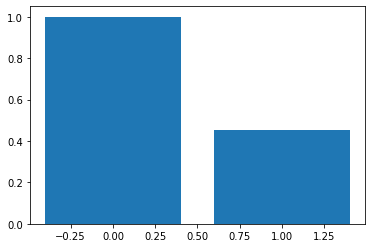

In [ ]:
plt.bar(customer.label, customer.fea_4)

<BarContainer object of 1125 artists>

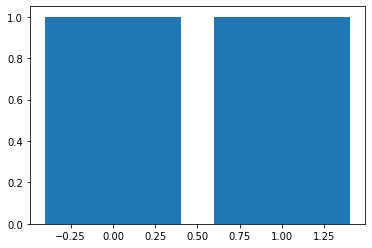

In [ ]:
plt.bar(customer.label, customer.fea_5)

<BarContainer object of 1125 artists>

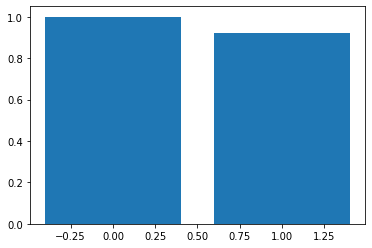

In [ ]:
plt.bar(customer.label, customer.fea_6)

<BarContainer object of 1125 artists>

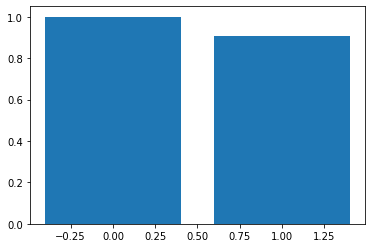

In [ ]:
plt.bar(customer.label, customer.fea_7)

<BarContainer object of 1125 artists>

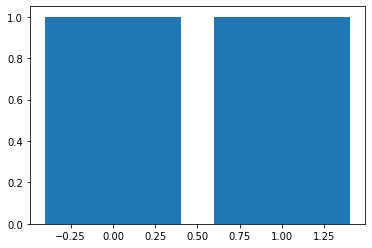

In [ ]:
plt.bar(customer.label, customer.fea_8)

<BarContainer object of 1125 artists>

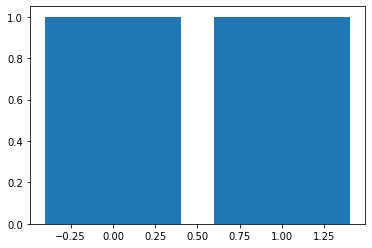

In [ ]:
plt.bar(customer.label, customer.fea_9)

<BarContainer object of 1125 artists>

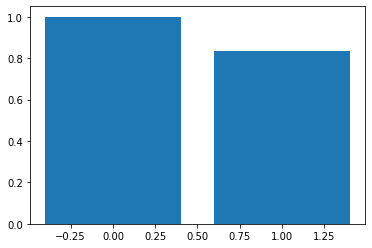

In [ ]:
plt.bar(customer.label, customer.fea_10)

<BarContainer object of 1125 artists>

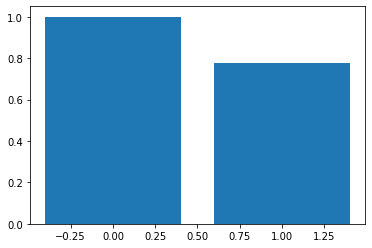

In [ ]:
plt.bar(customer.label, customer.fea_11)

## Regresión lineal Múltiple

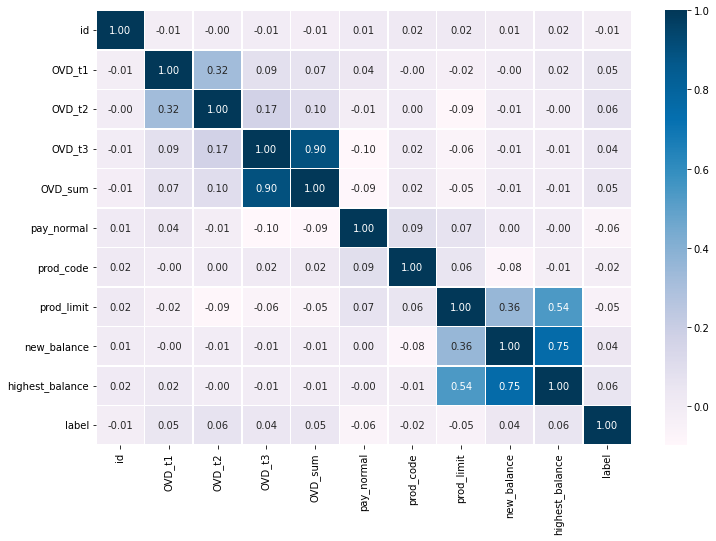

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(payriskhist.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

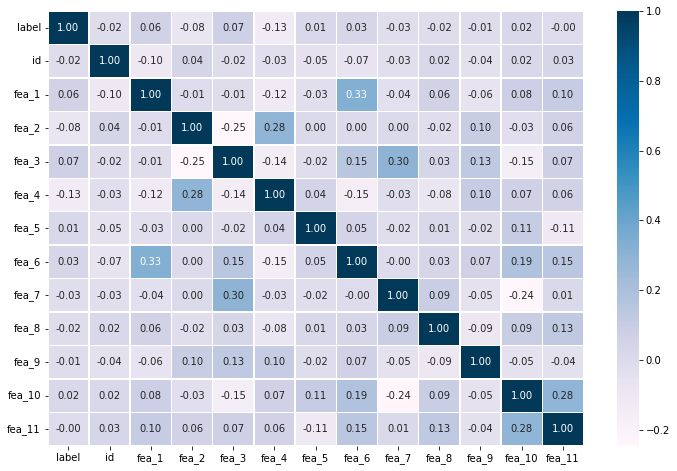

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(customer01.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [ ]:
X = payriskhist[['OVD_sum','pay_normal','prod_code','new_balance']]
y = payriskhist.label

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train

,OVD_sum,pay_normal,prod_code,new_balance
554,0.000000,0.527778,0.074074,0.009998
4036,0.000000,0.055556,0.074074,0.000247
4219,0.000952,0.833333,0.370370,0.000340
6217,0.000000,0.138889,0.000000,0.000247
2726,0.000000,0.305556,0.222222,0.000247
...,...,...,...,...
2895,0.000000,0.277778,0.222222,0.000247
7813,0.000000,1.000000,0.074074,0.029418
905,0.000000,0.222222,0.370370,0.000247
5192,0.000000,0.444444,0.185185,0.000247


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)

print('R2', r2_score(y_test, y_pred_test))

print('MAE', mean_absolute_error(y_test, y_pred_test))

print('MSE', mean_squared_error(y_test, y_pred_test))

print('RMSE', (mean_squared_error(y_test, y_pred_test))**(1/2))

R2 -0.029153322856482644
MAE 0.28461541374106913
MSE 0.15190303045361686
RMSE 0.3897473931325479


In [ ]:
y_pred_train = lr.predict(X_train)

print('R2', r2_score(y_train, y_pred_train))

print('MAE', mean_absolute_error(y_train, y_pred_train))

print('MSE', mean_squared_error(y_train, y_pred_train))

print('RMSE', (mean_squared_error(y_train, y_pred_train))**(1/2))

R2 0.007384211340752733
MAE 0.27371676607477374
MSE 0.13685838303738687
RMSE 0.36994375658657475


In [ ]:
X1 = customer01[['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11']]
y1 = customer01.label

from sklearn.model_selection import train_test_split

X1_train,X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.2, random_state=1)
X1_train

,fea_1,fea_2,fea_3,fea_4,fea_5,...,fea_7,fea_8,fea_9,fea_10,fea_11
262,0.500000,0.559671,0.0,0.090295,1.0,...,0.545455,0.764706,1.00,0.000078,0.000000
872,0.666667,0.419753,0.0,0.083544,1.0,...,0.545455,0.372549,0.50,0.661037,0.198867
203,1.000000,0.399177,1.0,0.114768,1.0,...,0.545455,0.980392,0.75,0.762794,0.355425
769,1.000000,0.337449,0.0,0.053165,1.0,...,0.000000,0.647059,0.50,0.527566,0.281827
70,0.500000,0.563786,1.0,0.016878,1.0,...,0.545455,0.607843,0.50,0.154727,0.243880
...,...,...,...,...,...,...,...,...,...,...,...
882,0.666667,0.670782,0.0,0.072574,1.0,...,0.909091,1.000000,0.50,0.000088,0.263534
82,0.666667,0.312757,1.0,0.036287,1.0,...,0.000000,0.549020,0.50,0.474554,0.172034
1044,0.500000,0.534979,0.0,0.129958,1.0,...,0.000000,0.941176,1.00,0.020337,0.000000
270,0.500000,0.539095,1.0,0.070042,0.0,...,0.909091,0.764706,1.00,0.154727,0.243880


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()

lr.fit(X1_train, y1_train)

y1_pred_test = lr.predict(X1_test)

print('R2', r2_score(y1_test, y1_pred_test))

print('MAE', mean_absolute_error(y1_test, y1_pred_test))

print('MSE', mean_squared_error(y1_test, y1_pred_test))

print('RMSE', (mean_squared_error(y1_test, y1_pred_test))**(1/2))

R2 0.02017299349710744
MAE 0.3021190314906417
MSE 0.15005003850626086
RMSE 0.387362928668014


In [ ]:
y1_pred_train = lr.predict(X1_train)

print('R2', r2_score(y1_train, y1_pred_train))

print('MAE', mean_absolute_error(y1_train, y1_pred_train))

print('MSE', mean_squared_error(y1_train, y1_pred_train))

print('RMSE', (mean_squared_error(y1_train, y1_pred_train))**(1/2))

R2 0.027106765980054792
MAE 0.305118306654004
MSE 0.151881042856641
RMSE 0.3897191846145645


##Regresión Logística (Supervisado)

In [58]:
X = payriskhist[['OVD_t1', 'OVD_t2', 'OVD_t3', 'pay_normal', 'new_balance']]
y = payriskhist.label

In [59]:
X.shape

(8250, 5)

In [60]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [61]:
predictions = model.predict(X)
print(predictions)

[0 0 0 ... 0 0 0]


In [62]:
model.score(X,y)

0.7972121212121213

In [63]:
validation_size = 0.20
seed = 1
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [64]:
name='Regresion Logistica'
cv_results = model_selection.cross_val_score(model, X_train, Y_train, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Regresion Logistica: 0.834848 (0.000000)


In [65]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.7915151515151515


In [66]:
print(confusion_matrix(Y_validation, predictions))

[[1294   59]
 [ 285   12]]


En este caso el accuracy es aceptable puesto que la presición es del 79%

In [70]:
predicciones = model.predict(X_validation)  
precision_aprendizaje = model.score(X_train,Y_train)  
precision = accuracy_score(Y_validation, predicciones)
predicciones
precision

0.7915151515151515

##PCA (No Supervisado)

In [ ]:
customer01 = customer.dropna()
customer01

,label,id,fea_1,fea_2,fea_3,...,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,0.666667,0.353909,1.0,...,0.545455,0.882353,1.00,0.154727,0.345485
1,0,59004779,0.500000,0.440329,0.0,...,0.000000,0.705882,0.50,0.477501,0.291987
2,0,58990862,1.000000,0.497942,0.0,...,0.000000,0.725490,1.00,0.020338,0.000000
3,1,58995168,1.000000,0.600823,0.0,...,0.545455,0.901961,0.50,0.000142,0.000000
5,0,59005995,0.833333,0.275720,1.0,...,0.000000,0.705882,0.50,0.000154,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1119,0,54985816,1.000000,0.559671,1.0,...,0.545455,0.901961,0.75,0.762737,0.351219
1120,0,58988196,0.666667,0.473251,0.0,...,0.545455,0.941176,0.50,0.492657,0.281827
1122,0,58995381,1.000000,0.283951,1.0,...,0.272727,0.509804,1.00,0.018645,0.000000
1123,0,58998054,0.500000,0.366255,1.0,...,0.545455,0.509804,1.00,0.020337,0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler


x = customer01[['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11']]
y = customer01.label

x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [ ]:
labelDataframe = customer.label
newDataframe = pd.concat([principalDataframe, labelDataframe], axis=1)

newDataframe

,PC1,PC2,PC3,label
0,-1.618353,-0.267660,0.722345,1
1,0.975492,2.039129,-2.145871,0
2,0.763511,1.141478,-1.016805,0
3,0.559898,0.674966,-0.883423,1
4,0.450245,-0.837496,-2.808380,0
...,...,...,...,...
1120,NaN,NaN,NaN,0
1121,NaN,NaN,NaN,0
1122,NaN,NaN,NaN,0
1123,NaN,NaN,NaN,0


In [ ]:
pca.explained_variance_ratio_

array([0.1515198 , 0.14684216, 0.11249481])

El Análisis de Componentes Principales nos permitió reducir todos las variables que reflejan las características sociodemográficas de los clientes bancarios en 3 factores, como vemos, el primer y segundo factor son los que más varianza explican, aunque aún si sumamos los tres factores, no explican mas del 50%